In [201]:
# Questão 1

from pandas_datareader import data as web
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

acoes_escolhidas = ['PETR4.SA', 'VALE3.SA', 'KLBN4.SA', 'EMBR3.SA', 'ABEV3.SA', '^BVSP']

start = dt.datetime(2017, 1, 1)
end = dt.datetime(2022, 1, 1)

cotacoes = web.get_data_yahoo(acoes_escolhidas, start=start, end=end) # Importando as cotações
cotacoes_adj = cotacoes['Adj Close'] # Selecionando apenas os fechamentos ajustados

logreturn = np.log(cotacoes_adj).diff() # Retorno logarítmo
logreturn = logreturn.drop(logreturn.index[0]) # Tirando a primeira linha, pois é ela é composta de NaNs

    # Montando o portfolio escolhendo um peso para cada ativo
    # (PETR4.SA = 20%, VALE3.SA = 60%, KLBN4.SA = 10%, EMBR3.SA = 7%, ABEV3.SA = 3%)
    
logportfolio = 0.2*logreturn['PETR4.SA'] + 0.6*logreturn['VALE3.SA'] + 0.1*logreturn['KLBN4.SA'] + 0.07*logreturn['EMBR3.SA'] + 0.03*logreturn['ABEV3.SA']
     
logportfolio_norm = (logportfolio - logportfolio.mean())/logportfolio.std() # Normalizando os retornos logarítmos
print('Retornos logarítmos do portfolio normalizados')
display(logportfolio_norm)

    # Quando normalizamos um conjunto de dados nós transformamos eles para uma nova medida mais apropriada para analisar a sua distribuição.
    # Ao fazermos este processo, nós conseguimos saber o quanto que cada observação está afastada da média, medida como um múltiplo
    # do desvio padrão dos dados. A normalização serve também para deixar todos os valores em uma escala comum.

Symbols     PETR4.SA  VALE3.SA  KLBN4.SA  EMBR3.SA  ABEV3.SA     ^BVSP
Date                                                                  
2017-01-03  0.055717  0.043341  0.024780  0.022251  0.020031  0.036659
2017-01-04  0.000000 -0.018123 -0.014085 -0.011682 -0.007843 -0.003647
2017-01-05  0.016000  0.037424  0.014085  0.020203  0.005436  0.007796
2017-01-06 -0.005731 -0.026972 -0.014085  0.004837 -0.008470 -0.006562
2017-01-09 -0.021298  0.020203 -0.014286  0.002410  0.004244  0.000567
...              ...       ...       ...       ...       ...       ...
2021-12-23  0.006019 -0.009681 -0.002026  0.031285  0.010343 -0.003360
2021-12-27  0.014716 -0.002530  0.010091  0.003689 -0.001287  0.006083
2021-12-28  0.001043 -0.024360 -0.008064  0.002044 -0.000644 -0.006340
2021-12-29 -0.008374  0.002592  0.000000 -0.002862 -0.004521 -0.007245
2021-12-30 -0.003158  0.009149  0.012072  0.016247 -0.001944  0.006844

[1242 rows x 6 columns]
Retornos logarítmos do portfolio normalizados


Date
2017-01-03    1.929467
2017-01-04   -0.674426
2017-01-05    1.308515
2017-01-06   -0.925672
2017-01-09    0.273443
                ...   
2021-12-23   -0.153465
2021-12-27    0.080912
2021-12-28   -0.757336
2021-12-29   -0.065975
2021-12-30    0.293025
Length: 1242, dtype: float64

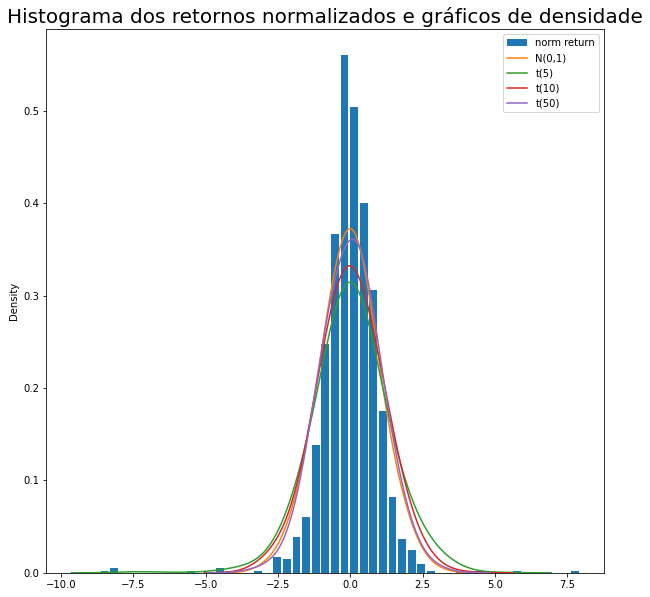

In [202]:
# Questão 2

import scipy.stats as stats
from scipy.stats import t
import seaborn as sns

# Definindo a distribuição normal e os seus parâmetros   
mu, sigma = 0, 1  
normal = np.random.normal(mu, sigma, 1242)

# Definindo as três distribuições t de Student
t_5 = t.rvs(df=5, size=1242)
t_10 = t.rvs(df=10, size=1242)
t_50 = t.rvs(df=50, size=1242)

# Plotando
plt.title('Histograma dos retornos normalizados e gráficos de densidade', fontsize=20)
plt.hist(logportfolio_norm, 50, rwidth=0.8, density = True, label='norm return') 
sns.kdeplot(normal, bw_method=0.5, label='N(0,1)')
sns.kdeplot(t_5, bw_method=0.5, label='t(5)')
sns.kdeplot(t_10, bw_method=0.5, label='t(10)')
sns.kdeplot(t_50, bw_method=0.5, label='t(50)')
plt.legend()
plt.show()

    # A distribuição t tem formato de sino e é simétrica como a distribuição normal. 
    # A diferença é que a t possui caudas mais pesadas, ou seja, ela produz valores mais afastados da sua média em comparação com a normal.

In [203]:
# Questão 3

# Assumindo que os log retornos são normais, vamos calcular a probabilidade de termos um retorno maior do que 3%

1 - stats.norm(logportfolio.mean(), logportfolio.std()).cdf(0.03)

0.08491267152928228

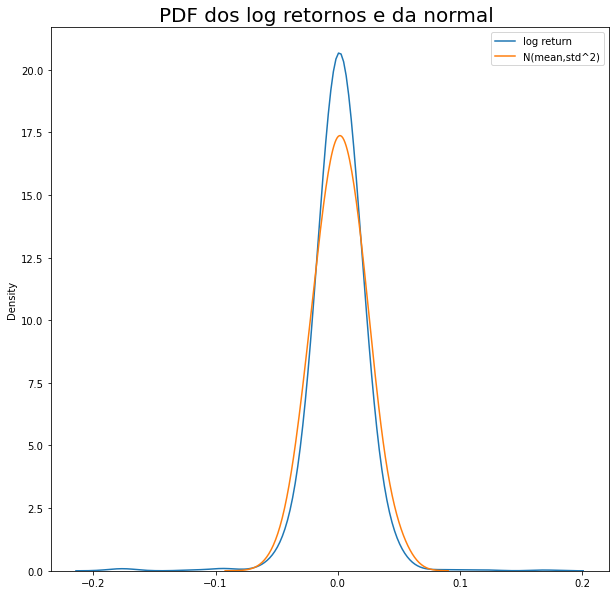

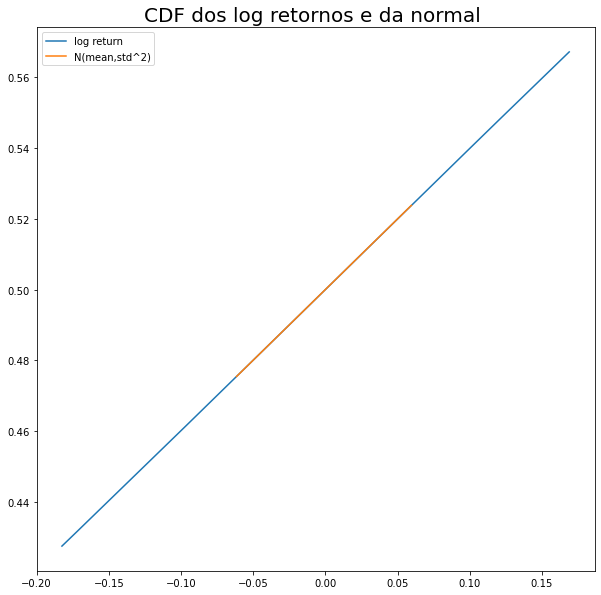

In [204]:
# Questão 4

# Nesta questão optei por plotar também a PDF e a CDF de uma normal com média e desvio padrão iguais ao dos log retornos

# Definindo a normal 
mean, std = logportfolio.mean(), logportfolio.std()  
normal_2 = np.random.normal(mean, std, 1242)

# Plotando as PDFs 
plt.title('PDF dos log retornos e da normal ', fontsize=20)
sns.kdeplot(logportfolio, bw_method=0.5, label='log return')
sns.kdeplot(normal_2, bw_method=0.5, label='N(mean,std^2)') 
plt.legend()
plt.show()

# Plotando as CDFs
normal_2_sorted = np.sort(normal_2) # ordenando as variáveis
logportfolio_sorted = np.sort(logportfolio)

cdf_norm = stats.norm.cdf(normal_2_sorted) # definindo as CDFs
cdf_logport = stats.norm.cdf(logportfolio_sorted)

plt.title('CDF dos log retornos e da normal ', fontsize=20)
plt.plot(logportfolio_sorted, cdf_logport, label='log return')
plt.plot(normal_2_sorted, cdf_norm, label='N(mean,std^2)')
plt.legend()
plt.show()

In [205]:
# Questão 5

# Calculando a curtose e a simetria dos log retornos e da normal padrão

print('Kurtose dos log retornos')
display(stats.kurtosis(logportfolio, fisher=True))
print('Kurtose da normal padrão')
display(stats.kurtosis(normal, fisher=True))

    # Calculando a kurtose de Fisher, é possível notar que a distribuição dos log retornos 
    # possui caudas bem mais pesadas do que a da normal padrão, isso significa que os retornos do portfolio são bem menos 
    # centrados na média em comparação com a normal

print('Simetria dos log retornos')
display(stats.skew(logportfolio))
print('Simetria da normal padrão')
display(stats.skew(normal))

    # Comparando com o valor da simetria da normal padrão, os log retornos possuem um pouco mais de massa à direita da distribuição,
    # sendo ela um pouco assimétrica

Kurtose dos log retornos


16.900221520874222

Kurtose da normal padrão


0.09484988721538912

Simetria dos log retornos


-1.1196447864123995

Simetria da normal padrão


-0.028497548381708242

In [206]:
# Questão 6

# Calculando o percentil de 25% dos retornos
display(np.percentile(logportfolio, 50))

# Como queremos a porcentagem dos dias que teremos retornos negativos, basta calcular qual é o "q-ésimo" percentil associado ao valor 0
display(stats.percentileofscore(logportfolio, 0))

0.00111073645912231

47.38325281803543

In [207]:
# Questão 7

# Considerando que os retornos são log-normais, calculamos a média e o desvio padrão 

print('média dos retornos log-normais')
display(np.exp(logportfolio.mean()))

print('desvio padrão dos retornos log-normais')
display(np.exp(logportfolio.std()))

média dos retornos log-normais


1.0009416151832806

desvio padrão dos retornos log-normais


1.0213937306536995

In [210]:
# Questão 8

# Testando:
    # H0: média dos retornos do portofolio = 0
    # H1: média dos retornos > 0
stats.ttest_1samp(logportfolio, 0, alternative = 'greater') # Para um alfa de 10%, nós rejeitamos a hipótese nula e inferimos que os retornos são maiores que 0

# Pegando os log retornos do IBOVESPA
logibov = logreturn['^BVSP']

# Testando:
    # H0: média dos retornos do portfolio = média dos retornos do IBOVESPA
    # H1: média dos retornos > média dos retornos do IBOVESPA
stats.ttest_rel(logportfolio, logibov, alternative = 'greater')

    # Cometemos o erro do tipo 1 quando rejeitamos a hipótese nula quando ela é verdadeira, 
    # e cometemos o erro do tipo 2 quando não rejeitamos a nula quando ela é falsa

Date
2017-01-03    0.041784
2017-01-04   -0.013335
2017-01-05    0.028640
2017-01-06   -0.018654
2017-01-09    0.006729
                ...   
2021-12-23   -0.002307
2021-12-27    0.002654
2021-12-28   -0.015090
2021-12-29   -0.000455
2021-12-30    0.007144
Length: 1242, dtype: float64

Date
2017-01-03    0.036659
2017-01-04   -0.003647
2017-01-05    0.007796
2017-01-06   -0.006562
2017-01-09    0.000567
                ...   
2021-12-23   -0.003360
2021-12-27    0.006083
2021-12-28   -0.006340
2021-12-29   -0.007245
2021-12-30    0.006844
Name: ^BVSP, Length: 1242, dtype: float64

Ttest_relResult(statistic=nan, pvalue=nan)